# FGNET-LOPO EDA

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Data Manipulation

In [2]:
df_fgnet_lopo = pd.read_csv("data/FGNet-LOPO.csv")
df_fgnet_lopo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Columns: 112 entries, b1 to Gender_0M_1F
dtypes: float64(109), int64(3)
memory usage: 876.9 KB


In [3]:
df_fgnet_lopo.head()

,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,...,b103,b104,b105,b106,b107,b108,b109,age,ID,Gender_0M_1F
0,0.585770,-0.075982,-0.276594,0.076490,0.189404,-0.152451,0.003264,-0.366677,0.148862,-0.078316,...,-0.007170,0.012785,0.014379,-0.032976,-0.005910,0.015997,-0.002833,5,1,0
1,0.117512,-0.344377,0.413923,-0.088210,0.152117,-0.020675,-0.085257,-0.122578,0.085524,-0.035403,...,-0.024755,0.006724,0.014217,0.001321,-0.005616,-0.018197,-0.000073,8,1,0
2,0.248636,-0.209122,0.516829,-0.124100,-0.002087,0.165375,-0.033023,0.035212,0.156937,-0.028065,...,-0.035687,0.023377,0.028616,-0.009582,-0.020722,0.003676,-0.015716,10,1,0
3,0.136742,-0.095098,0.428192,-0.125278,-0.117103,0.080187,0.109120,-0.068001,0.185257,-0.001298,...,0.020454,0.021750,0.006348,-0.006021,-0.005336,0.002317,-0.014843,14,1,0
4,-0.371003,-0.164112,0.431468,-0.163736,-0.217533,0.083152,-0.053181,-0.169808,0.178207,-0.000211,...,0.007863,0.008738,0.002282,-0.021130,-0.009988,-0.016178,-0.003646,16,1,0


In [4]:
df_fgnet_lopo.columns

Index(['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9', 'b10',
       ...
       'b103', 'b104', 'b105', 'b106', 'b107', 'b108', 'b109', 'age', 'ID',
       'Gender_0M_1F'],
      dtype='object', length=112)

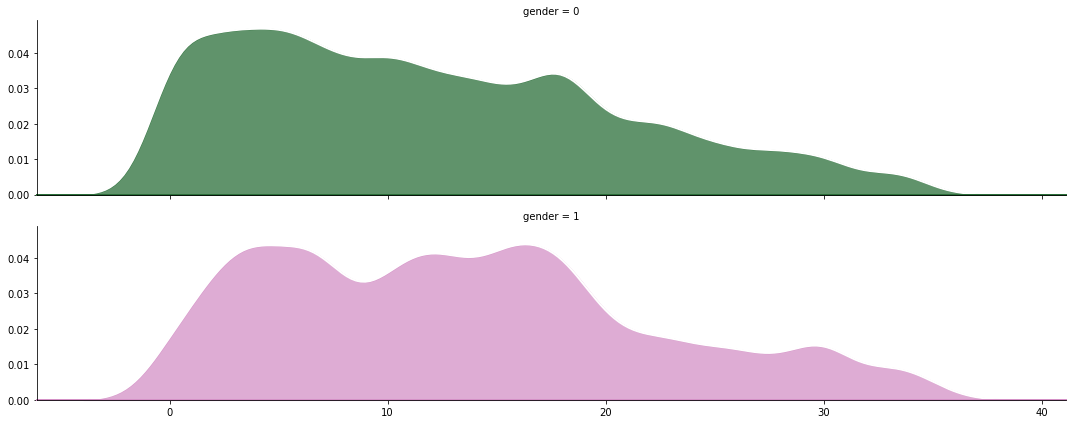

In [5]:
age_gender = df_fgnet_lopo[['age','Gender_0M_1F']].rename(columns={'Gender_0M_1F': 'gender'}).sort_values(by='age')[:-100]
age_gender['gender'] = age_gender['gender']

fg = sns.FacetGrid(age_gender, row='gender', hue='gender', aspect=5, palette='cubehelix')
fg.map(sns.kdeplot, 'age', bw_adjust=.5, clip_on=False, fill=True, alpha=.75, linewidth=1.5)
fg.map(sns.kdeplot, 'age', clip_on=False, color='w', lw=2, bw_adjust=.5)
fg.map(plt.axhline, y=0, lw=2, clip_on=False)

In [6]:
X = df_fgnet_lopo.drop(['age','ID','Gender_0M_1F'], axis=1)
y = df_fgnet_lopo[['age','ID','Gender_0M_1F']]

In [7]:
X.columns

Index(['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9', 'b10',
       ...
       'b100', 'b101', 'b102', 'b103', 'b104', 'b105', 'b106', 'b107', 'b108',
       'b109'],
      dtype='object', length=109)

In [8]:
y.columns

Index(['age', 'ID', 'Gender_0M_1F'], dtype='object')

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [10]:
print(X.shape)
print(X_train.shape)
print(X_test.shape[0] / X.shape[0])

(1002, 109)
(801, 109)
0.20059880239520958


In [11]:
print(f'X: {X.shape} | X_train: {X_train.shape} | X_test: {X_test.shape}')
print(f'y: {y.shape} | y_train: {y_train.shape} | y_test: {y_test.shape}')

X: (1002, 109) | X_train: (801, 109) | X_test: (201, 109)
y: (1002, 3) | y_train: (801, 3) | y_test: (201, 3)


### PCA

In [12]:
from sklearn.decomposition import PCA

lopo_pca = PCA(n_components=3)
lopo_pca.fit(X)

df_pca = pd.concat({
    'X': pd.DataFrame(lopo_pca.transform(X), columns=['PC1', 'PC2', 'PC3']),
    'X_train': pd.DataFrame(lopo_pca.transform(X_train), columns=['PC1', 'PC2', 'PC3']),
    'X_test': pd.DataFrame(lopo_pca.transform(X_test), columns=['PC1', 'PC2', 'PC3']),
}, axis=0)
df_pca

PC1       PC2       PC3
X      0    0.585492 -0.068204 -0.274003
       1    0.119893 -0.351934  0.403403
       2    0.250850 -0.217578  0.505914
       3    0.138149 -0.102591  0.419126
       4   -0.369514 -0.173921  0.419965
...              ...       ...       ...
X_test 196 -0.369514 -0.173921  0.419965
       197  1.345986 -0.069989  0.007850
       198 -0.144766  0.817860 -0.234692
       199 -0.016290  0.226374 -0.264630
       200  0.147275 -0.172847  0.070667

[2004 rows x 3 columns]

In [13]:
df_pca.loc['X',:]['PC1']

0       0.585492
1       0.119893
2       0.250850
3       0.138149
4      -0.369514
          ...   
997    -0.098102
998    -1.231202
999    -0.300253
1000   -1.651637
1001   -1.020738
Name: PC1, Length: 1002, dtype: float64

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

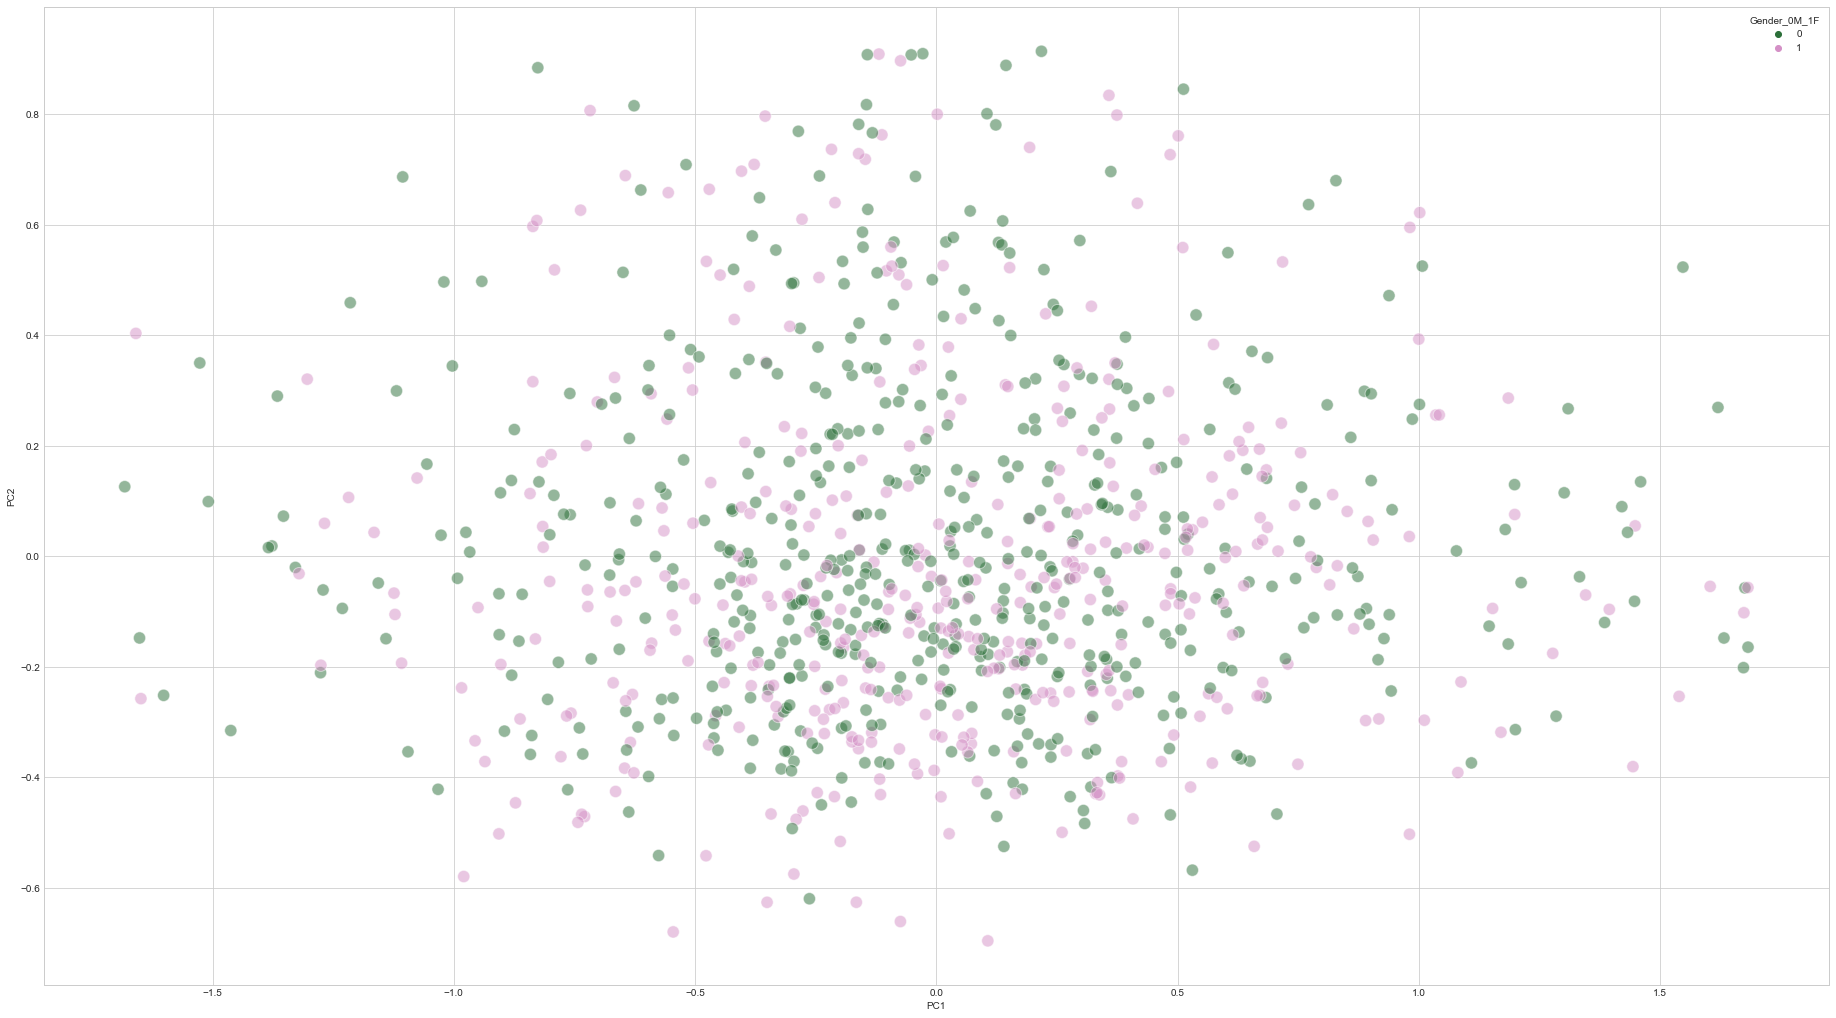

In [79]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(32,18))
sns.scatterplot(x=df_pca.loc['X',:]['PC1'],
                y=df_pca.loc['X',:]['PC2'],
                # hue=y['ID'], 
                hue=y['Gender_0M_1F'],
                palette='cubehelix',
                legend='full',
                s=150,
                alpha=.5)
plt.title('Gender (PC1, PC2')

In [74]:
X_pca = lopo_pca.transform(X)
sns.scatterplot(x=X_pca.loc['X',:]['PC1'],
                y=df_pca.loc['X',:]['PC2'],
                # hue=y['ID'], 
                hue=df_pca.loc['X',:]['PC3'],
                style=y['Gender_0M_1F'],
                palette='cubehelix',
                # legend='full',
                s=150,
                alpha=.5)

[[ 0.58549199 -0.06820379 -0.27400265]
 [ 0.11989347 -0.35193409  0.40340285]
 [ 0.25084966 -0.21757789  0.50591377]
 ...
 [-0.30025251 -0.38836239  0.12908686]
 [-1.65163711 -0.14780115  0.27044227]
 [-1.02073762  0.49681342 -0.22844173]]


## Classifiers

In [49]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, KBinsDiscretizer, OneHotEncoder

RANDOM_STATE = 42
gender_train = y_train['Gender_0M_1F']
gender_test = y_test['Gender_0M_1F']
age_train = y_train['age']
age_test = y_test['age']

### Linear Models
#### Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

clf_logreg = LogisticRegression(random_state=RANDOM_STATE)
clf_logreg.fit(X_train, y_train['Gender_0M_1F'])

LogisticRegression(random_state=42)

In [31]:
clf_logreg_pred = clf_logreg.predict(X_test)
clf_logreg_pred

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1])

In [32]:
clf_logreg.score(X_test, y_test['Gender_0M_1F'])

0.7860696517412935

In [33]:
clf_logreg.score(X_train, y_train['Gender_0M_1F'])

0.8077403245942572

In [34]:
print(confusion_matrix(y_test['Gender_0M_1F'], clf_logreg_pred))
print(classification_report(y_test['Gender_0M_1F'], clf_logreg_pred))

[[87 11]
 [32 71]]
              precision    recall  f1-score   support

           0       0.73      0.89      0.80        98
           1       0.87      0.69      0.77       103

    accuracy                           0.79       201
   macro avg       0.80      0.79      0.78       201
weighted avg       0.80      0.79      0.78       201



In [38]:
clf_logreg_gscv = GridSearchCV(
    LogisticRegression(random_state=RANDOM_STATE),
    param_grid={
        'C': np.logspace(-3, 3, 7),
        'solver': ['lbfgs', 'liblinear', 'newton-cg', 'saga'],
        'class_weight': [None, 'balanced']
    },
    n_jobs=6,
)

clf_logreg_gscv.fit(X_train, y_train['Gender_0M_1F'])
print(f'Best Params: {clf_logreg_gscv.best_params_}\nBest Score: {clf_logreg_gscv.best_score_}')


Best Params: {'C': 10.0, 'class_weight': None, 'solver': 'lbfgs'}
Best Score: 0.8065760869565217


In [44]:
print(clf_logreg_gscv.best_estimator_.score(X_test, y_test['Gender_0M_1F']))
print(
    classification_report(y_test['Gender_0M_1F'], clf_logreg_gscv.best_estimator_.predict(X_test))
)

0.8208955223880597
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        98
           1       0.86      0.78      0.82       103

    accuracy                           0.82       201
   macro avg       0.82      0.82      0.82       201
weighted avg       0.82      0.82      0.82       201



#### Ridge Classifier

In [45]:
from sklearn.linear_model import RidgeClassifier

clf_ridge = RidgeClassifier(random_state=RANDOM_STATE)
clf_ridge.fit(X_train, y_train['Gender_0M_1F'])
print(clf_ridge.score(X_test, y_test['Gender_0M_1F']))
print(classification_report(y_test['Gender_0M_1F'], clf_ridge.predict(X_test)))

0.8059701492537313
              precision    recall  f1-score   support

           0       0.77      0.87      0.81        98
           1       0.86      0.75      0.80       103

    accuracy                           0.81       201
   macro avg       0.81      0.81      0.81       201
weighted avg       0.81      0.81      0.81       201



In [47]:
clf_ridge_gscv = GridSearchCV(
    RidgeClassifier(random_state=RANDOM_STATE),
    param_grid={
        'alpha': np.linspace(0, 5, 20),
        'normalize': [True, False],
        'class_weight': [None, 'balanced'],
    },
    n_jobs=6
)

clf_ridge_gscv.fit(X_train, y_train['Gender_0M_1F'])
print(f'Best Params: {clf_ridge_gscv.best_params_}\n'
      f'Best Score: {clf_ridge_gscv.best_score_}')

Best Params: {'alpha': 0.2631578947368421, 'class_weight': None, 'normalize': False}
Best Score: 0.8190760869565217


In [48]:
print(clf_ridge_gscv.best_estimator_.score(X_test, y_test['Gender_0M_1F']))
print(
    classification_report(y_test['Gender_0M_1F'], clf_ridge_gscv.best_estimator_.predict(X_test))
)

0.8308457711442786
              precision    recall  f1-score   support

           0       0.79      0.89      0.84        98
           1       0.88      0.78      0.82       103

    accuracy                           0.83       201
   macro avg       0.84      0.83      0.83       201
weighted avg       0.84      0.83      0.83       201



#### SGD Classifier

In [50]:
from sklearn.linear_model import SGDClassifier

clf_sgd = SGDClassifier(random_state=RANDOM_STATE)
clf_sgd.fit(X_train, gender_train)
print(clf_sgd.score(X_test, gender_test))
print(classification_report(gender_test, clf_sgd.predict(X_test)))

0.8208955223880597
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        98
           1       0.87      0.77      0.81       103

    accuracy                           0.82       201
   macro avg       0.82      0.82      0.82       201
weighted avg       0.83      0.82      0.82       201



In [51]:
clf_sgd_gscv = GridSearchCV(
    SGDClassifier(random_state=RANDOM_STATE),
    param_grid={
        'loss': ['hinge', 'squared_hinge', 'modified_huber', 'perceptron'],
        'penalty': ['l2', 'l1', 'elasticnet'],
        'l1_ratio': np.linspace(0, .9, 6)
    },
    n_jobs=6
)

clf_sgd_gscv.fit(X_train, gender_train)
print(f'Best Params: {clf_sgd_gscv.best_params_}\n'
      f'Best Score: {clf_sgd_gscv.best_score_}')

Best Params: {'l1_ratio': 0.36, 'loss': 'hinge', 'penalty': 'elasticnet'}
Best Score: 0.8090760869565218


In [52]:
print(clf_sgd_gscv.best_estimator_.score(X_test, y_test['Gender_0M_1F']))
print(
    classification_report(gender_test, clf_sgd_gscv.best_estimator_.predict(X_test))
)

0.8009950248756219
              precision    recall  f1-score   support

           0       0.76      0.86      0.81        98
           1       0.85      0.75      0.79       103

    accuracy                           0.80       201
   macro avg       0.80      0.80      0.80       201
weighted avg       0.81      0.80      0.80       201



### LDA/QDA

In [53]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf_lda = LinearDiscriminantAnalysis(random_state=RANDOM_STATE)
clf_lda.fit(X_train, gender_train)
print(clf_lda.score(X_test, gender_test))
print(classification_report(gender_test, clf_lda.predict(X_test)))

0.8208955223880597
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        98
           1       0.85      0.80      0.82       103

    accuracy                           0.82       201
   macro avg       0.82      0.82      0.82       201
weighted avg       0.82      0.82      0.82       201



In [54]:
clf_lda_gscv = GridSearchCV(
    LinearDiscriminantAnalysis(random_state=RANDOM_STATE),
    param_grid={
        'solver': ['svd', 'lsqr', 'eigen'],
        'shrinkage': [None, 'auto'],
    },
    n_jobs=6
)

clf_lda_gscv.fit(X_train, gender_train)
print(f'Best Params: {clf_lda_gscv.best_params_}\n'
      f'Best Score: {clf_lda_gscv.best_score_}')

Best Params: {'shrinkage': None, 'solver': 'svd'}
Best Score: 0.797864906832298


In [55]:
print(clf_lda_gscv.best_estimator_.score(X_test, y_test['Gender_0M_1F']))
print(
    classification_report(gender_test, clf_lda_gscv.best_estimator_.predict(X_test))
)

0.8208955223880597
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        98
           1       0.85      0.80      0.82       103

    accuracy                           0.82       201
   macro avg       0.82      0.82      0.82       201
weighted avg       0.82      0.82      0.82       201



In [63]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

clf_qda = QuadraticDiscriminantAnalysis(random_state=RANDOM_STATE)
clf_qda.fit(X_train, gender_train)
print(clf_qda.score(X_test, gender_test))
print(classification_report(gender_test, clf_qda.predict(X_test)))

0.8557213930348259
              precision    recall  f1-score   support

           0       0.79      0.95      0.87        98
           1       0.94      0.77      0.84       103

    accuracy                           0.86       201
   macro avg       0.87      0.86      0.86       201
weighted avg       0.87      0.86      0.85       201



### SVM

In [64]:
from sklearn.svm import LinearSVC, SVC

clf_svc = SVC(random_state=RANDOM_STATE)
clf_svc.fit(X_train, gender_train)
print(clf_svc.score(X_test, gender_test))
print(classification_report(gender_test, clf_svc.predict(X_test)))

0.8159203980099502
              precision    recall  f1-score   support

           0       0.76      0.91      0.83        98
           1       0.89      0.73      0.80       103

    accuracy                           0.82       201
   macro avg       0.83      0.82      0.82       201
weighted avg       0.83      0.82      0.81       201



In [69]:
clf_svc_gscv = GridSearchCV(
    SVC(random_state=RANDOM_STATE),
    param_grid={
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'degree': [3, 5, 7, 9],
        'C': np.linspace(1.0, 10.0, 10),
    },
    n_jobs=6
)

clf_svc_gscv.fit(X_train, gender_train)
print(f'Best Params: {clf_svc_gscv.best_params_}\n'
      f'Best Score: {clf_svc_gscv.best_score_}')

Best Params: {'C': 4.0, 'degree': 3, 'kernel': 'linear'}
Best Score: 0.8265450310559006


In [70]:
print(clf_svc_gscv.best_estimator_.score(X_test, y_test['Gender_0M_1F']))
print(
    classification_report(gender_test, clf_svc_gscv.best_estimator_.predict(X_test))
)

0.835820895522388
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        98
           1       0.89      0.78      0.83       103

    accuracy                           0.84       201
   macro avg       0.84      0.84      0.84       201
weighted avg       0.84      0.84      0.84       201



### KNN/K-Means

### Voting Classifiers

In [61]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(random_state=RANDOM_STATE)
clf_tree.fit(X_train, gender_train)
clf_tree.score(X_test, gender_test)

0.6616915422885572

## Regressors

### Linear Models
#### Linear Regression

#### Ridge Regression

#### SGD Regressor

### LDA/QDA


### SVM

### KNN/K-Means Regression

### Voting Regressors